In [1]:
import os
import numpy as np
import yaml
import pandas as pd
import networkx as nx

In [2]:
X_train = pd.read_csv('Louvain/node_x_train.csv', index_col=0)
y_train = pd.read_csv('Louvain/node_y_train.csv', index_col=0)

In [3]:
runs = 100

In [4]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [6]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.7763975155279503, 0.7950310559006211, 0.7391304347826086, 0.7453416149068323, 0.7515527950310559, 0.7577639751552795, 0.7639751552795031, 0.7639751552795031, 0.7763975155279503, 0.7577639751552795, 0.7639751552795031, 0.782608695652174, 0.7639751552795031, 0.7763975155279503, 0.7701863354037267, 0.7515527950310559, 0.7577639751552795, 0.7515527950310559, 0.7639751552795031, 0.7577639751552795, 0.7577639751552795, 0.7577639751552795, 0.782608695652174, 0.7639751552795031, 0.7701863354037267, 0.7950310559006211, 0.7763975155279503, 0.7577639751552795, 0.7577639751552795, 0.7453416149068323, 0.782608695652174, 0.7701863354037267, 0.7701863354037267, 0.782608695652174, 0.7577639751552795, 0.7639751552795031, 0.7701863354037267, 0.7639751552795031, 0.7763975155279503, 0.7639751552795031, 0.7763975155279503, 0.7577639751552795, 0.7701863354037267, 0.7701863354037267, 0.782608695652174, 0.7453416149068323, 0.7577639751552795, 0.8012422360248447, 0.7763975155279503, 0.7639751552795031, 0.77

In [7]:
df_importances = pd.DataFrame(rows).set_index("run")

In [8]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

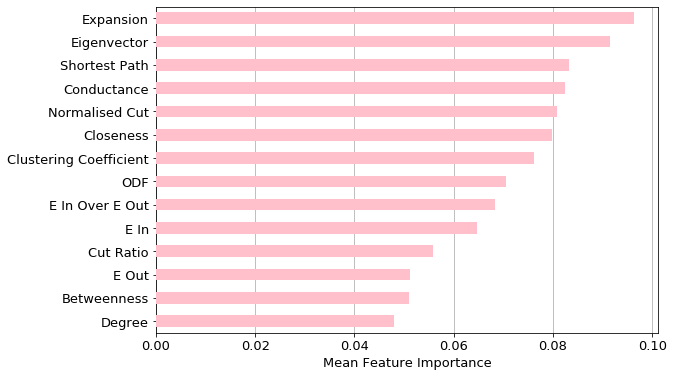

In [9]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="pink", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

In [10]:
X_train = pd.read_csv('Infomap/node_x_train.csv', index_col=0)
y_train = pd.read_csv('Infomap/node_y_train.csv', index_col=0)

In [11]:
runs = 100

In [12]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [14]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.7453416149068323, 0.7763975155279503, 0.7267080745341615, 0.7515527950310559, 0.7515527950310559, 0.7391304347826086, 0.7204968944099379, 0.7515527950310559, 0.7018633540372671, 0.7391304347826086, 0.7329192546583851, 0.7577639751552795, 0.7391304347826086, 0.7577639751552795, 0.7577639751552795, 0.7515527950310559, 0.7515527950310559, 0.7267080745341615, 0.7204968944099379, 0.7577639751552795, 0.7391304347826086, 0.7453416149068323, 0.7391304347826086, 0.7391304347826086, 0.7763975155279503, 0.7204968944099379, 0.7639751552795031, 0.7453416149068323, 0.7515527950310559, 0.7453416149068323, 0.7267080745341615, 0.7639751552795031, 0.7453416149068323, 0.7701863354037267, 0.7267080745341615, 0.7515527950310559, 0.6956521739130435, 0.7515527950310559, 0.7267080745341615, 0.7453416149068323, 0.7391304347826086, 0.7639751552795031, 0.7515527950310559, 0.7453416149068323, 0.7267080745341615, 0.7267080745341615, 0.7639751552795031, 0.7453416149068323, 0.7453416149068323, 0.7577639751552795,

In [15]:
df_importances = pd.DataFrame(rows).set_index("run")

In [16]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

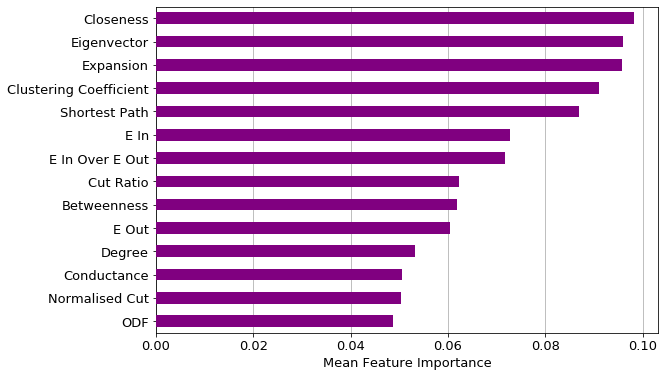

In [17]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="purple", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

In [18]:
X_train = pd.read_csv('LPA/node_x_train.csv', index_col=0)
y_train = pd.read_csv('LPA/node_y_train.csv', index_col=0)

In [19]:
runs = 100

In [20]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [22]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.782608695652174, 0.7950310559006211, 0.7950310559006211, 0.782608695652174, 0.782608695652174, 0.7888198757763976, 0.8012422360248447, 0.782608695652174, 0.7888198757763976, 0.782608695652174, 0.782608695652174, 0.7950310559006211, 0.7950310559006211, 0.7639751552795031, 0.7577639751552795, 0.8198757763975155, 0.7577639751552795, 0.7950310559006211, 0.7888198757763976, 0.8074534161490683, 0.7763975155279503, 0.7639751552795031, 0.7950310559006211, 0.8198757763975155, 0.8012422360248447, 0.8012422360248447, 0.8012422360248447, 0.7763975155279503, 0.782608695652174, 0.7888198757763976, 0.8198757763975155, 0.8136645962732919, 0.8012422360248447, 0.7888198757763976, 0.7950310559006211, 0.7950310559006211, 0.7763975155279503, 0.7763975155279503, 0.8074534161490683, 0.7763975155279503, 0.8012422360248447, 0.7763975155279503, 0.8136645962732919, 0.8136645962732919, 0.7888198757763976, 0.8012422360248447, 0.8012422360248447, 0.782608695652174, 0.782608695652174, 0.7950310559006211, 0.788819

In [23]:
df_importances = pd.DataFrame(rows).set_index("run")

In [24]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

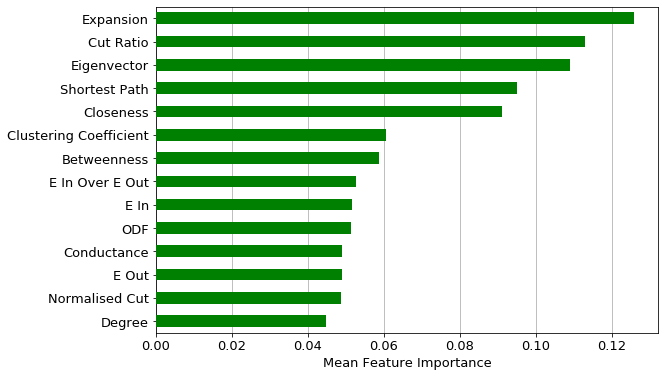

In [25]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="green", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()